# Presto Demo
Presto is a fast product recommendation algorithm that can process millions of reviews in milliseconds, providing recommendations similar to the 'users who liked this product also liked' recommendations on an e-commerce site.

This notebook simulates how Presto would work on a production website. Just enter a category (Books, Albums, Artists, or Authors) and a search term to receive instant product recommendations based on user reviews.

For more details on how Presto works, see the numbered notebooks in the presto folder.

In [2]:
%load_ext autoreload

In [3]:
%autoreload 
%run presto/demo_implementation.ipynb
conn = q.connect('presto/data/products.sql')

Found Down and Out in Paris and London recommendations in 0.253 seconds


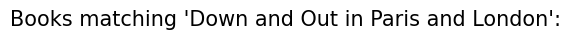

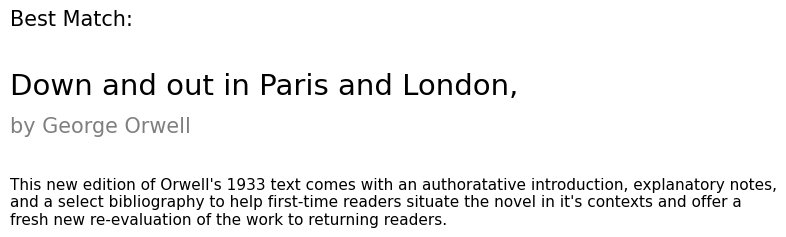

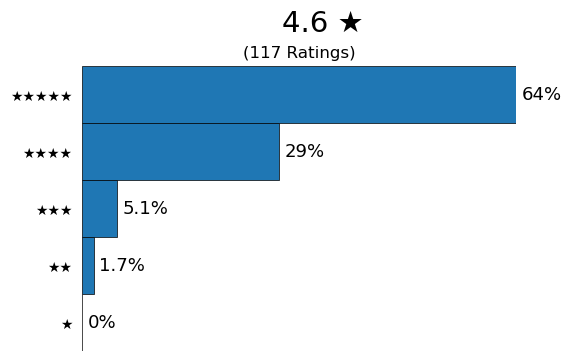

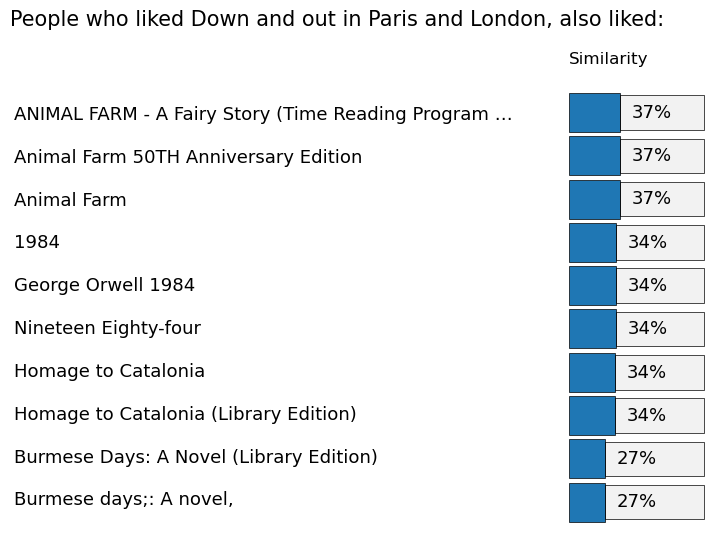

In [6]:
# Search input
type = 'Book' # possibilities: Book, Album, Artist, Author
search = 'Down and Out in Paris and London'
exact_match = True

# recommender/output settings
max_search_results = 10 # Relevant in case of ambiguous search terms with multiple hits. Presto will resolve ambiguity by selecting the most-reviewd product
max_recommendations = 10 # How many of Presto's related products to display to the usser
recommender_user_pool_size = 100 # For large numbers of user reviews, consider only this many users for recommendations. Filters by users who leave the most reviews.
recommender_product_pool_size = 1_000 # For large numbers of user reviews, consider only this many products for recommendations. Filters by number of reviews

log_verbosity = 0 # Increase to see internal details

###################################
# Recommendations
##################################
results = output_recommendations(type, search, exact_match, conn = conn)
product = results['result']
products = results['results']
recommendations = results['recommendations']